In [ ]:
!pip install pyspark

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql import SparkSession

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .appName("Colab")\
        .getOrCreate()

In [ ]:
spark

In [ ]:

df  = spark.read.csv("/content/cardio_train.csv", header=True, inferSchema=True)


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LinearSVC

# Define all the feature columns
selected_features = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]

# Feature vector assembly for selected features
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
assembled_df = assembler.transform(df)

# Split the data into training and testing sets
(train_data, test_data) = assembled_df.randomSplit([0.8, 0.2], seed=123)

# # Initialize and train Logistic Regression model
# lr = LogisticRegression(featuresCol="features", labelCol="cardio")
# lr_model = lr.fit(train_data)
# lr_predictions = lr_model.transform(test_data)

# # Evaluate Logistic Regression model
# evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")
# lr_accuracy = evaluator.evaluate(lr_predictions)
# lr_f1 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})
# lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})
# lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})

# print("Logistic Regression Accuracy:", lr_accuracy)
# print("Logistic Regression F1-score:", lr_f1)
# print("Logistic Regression Precision:", lr_precision)
# print("Logistic Regression Recall:", lr_recall)

# # Initialize and train Multilayer Perceptron model
# layers = [len(selected_features), 6, 6, 2]  # Define the layers for the neural network
# mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="cardio", layers=layers)
# mlp_model = mlp.fit(train_data)
# mlp_predictions = mlp_model.transform(test_data)

# # Evaluate Multilayer Perceptron model
# mlp_accuracy = evaluator.evaluate(mlp_predictions)
# mlp_f1 = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "f1"})
# mlp_precision = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedPrecision"})
# mlp_recall = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedRecall"})

# print("Multilayer Perceptron Accuracy:", mlp_accuracy)
# # print("Multilayer Perceptron F1-score:", mlp_f1)
# print("Multilayer Perceptron Precision:", mlp_precision)
# print("Multilayer Perceptron Recall:", mlp_recall)

# # Initialize and train Decision Tree Classifier
# dt = DecisionTreeClassifier(featuresCol="features", labelCol="cardio")
# dt_model = dt.fit(train_data)
# dt_predictions = dt_model.transform(test_data)

# # Evaluate Decision Tree model
# dt_accuracy = evaluator.evaluate(dt_predictions)
# dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})
# dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
# dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})

# print("Decision Tree Classifier Accuracy:", dt_accuracy)
# print("Decision Tree Classifier F1-score:", dt_f1)
# print("Decision Tree Classifier Precision:", dt_precision)
# print("Decision Tree Classifier Recall:", dt_recall)

# # Initialize and train SVM (LinearSVC) model
# svm = LinearSVC(featuresCol="features", labelCol="cardio")
# svm_model = svm.fit(train_data)
# svm_predictions = svm_model.transform(test_data)

# # Evaluate SVM model
# svm_accuracy = evaluator.evaluate(svm_predictions)
# svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})
# svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
# svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})

# print("SVM (LinearSVC) Accuracy:", svm_accuracy)
# print("SVM (LinearSVC) F1-score:", svm_f1)
# print("SVM (LinearSVC) Precision:", svm_precision)
# print("SVM (LinearSVC) Recall:", svm_recall)





ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
from pyspark.ml.classification import GBTClassifier, RandomForestClassifier

# Initialize and train Gradient Boosted Tree (GBT) Classifier
gbt = GBTClassifier(featuresCol="features", labelCol="cardio")
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)


# Evaluate GBT Classifier
gbt_accuracy = evaluator.evaluate(gbt_predictions)
gbt_f1 = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "f1"})
gbt_precision = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedPrecision"})
gbt_recall = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "weightedRecall"})

print("GBT Classifier Accuracy:", gbt_accuracy)
print("GBT Classifier F1-score:", gbt_f1)
print("GBT Classifier Precision:", gbt_precision)
print("GBT Classifier Recall:", gbt_recall)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="cardio")
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)

# Evaluate Random Forest Classifier
rf_accuracy = evaluator.evaluate(rf_predictions)
rf_f1 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "f1"})
rf_precision = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedPrecision"})
rf_recall = evaluator.evaluate(rf_predictions, {evaluator.metricName: "weightedRecall"})

print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier F1-score:", rf_f1)
print("Random Forest Classifier Precision:", rf_precision)
print("Random Forest Classifier Recall:", rf_recall)




GBT Classifier Accuracy: 0.7320191414898936
GBT Classifier F1-score: 0.7309050256289901
GBT Classifier Precision: 0.7347480498759289
GBT Classifier Recall: 0.7320191414898936
Random Forest Classifier Accuracy: 0.7230912077708735
Random Forest Classifier F1-score: 0.7225588198143224
Random Forest Classifier Precision: 0.7240703122740522
Random Forest Classifier Recall: 0.7230912077708735


In [ ]:
# True labels and predicted labels for Logistic Regression
lr_true_labels = lr_predictions.select("cardio").rdd.flatMap(lambda x: x).collect()
lr_predicted_labels = lr_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
# True labels and predicted labels for Multilayer Perceptron
mlp_true_labels = mlp_predictions.select("cardio").rdd.flatMap(lambda x: x).collect()
mlp_predicted_labels = mlp_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
# True labels and predicted labels for Decision Tree
dt_true_labels = dt_predictions.select("cardio").rdd.flatMap(lambda x: x).collect()
dt_predicted_labels = dt_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
# True labels and predicted labels for SVM (LinearSVC)
svm_true_labels = svm_predictions.select("cardio").rdd.flatMap(lambda x: x).collect()
svm_predicted_labels = svm_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
# True labels and predicted labels for GBT Classifier
gbt_true_labels = gbt_predictions.select("cardio").rdd.flatMap(lambda x: x).collect()
gbt_predicted_labels = gbt_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
# True labels and predicted labels for Random Forest
rf_true_labels = rf_predictions.select("cardio").rdd.flatMap(lambda x: x).collect()
rf_predicted_labels = rf_predictions.select("prediction").rdd.flatMap(lambda x: x).collect()


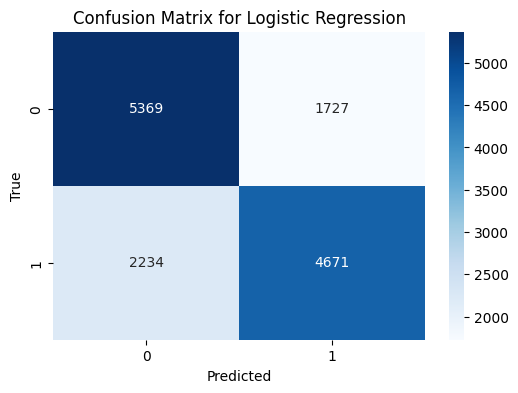

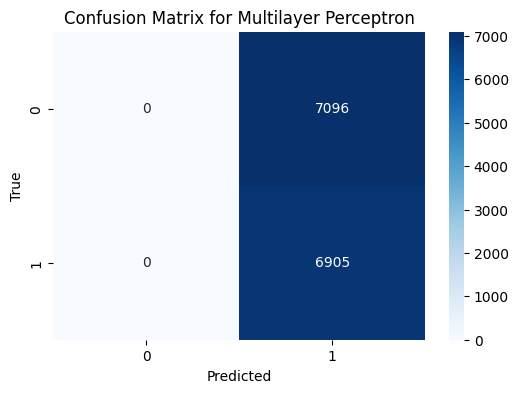

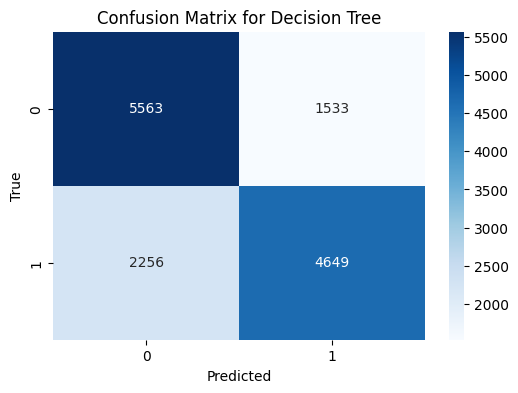

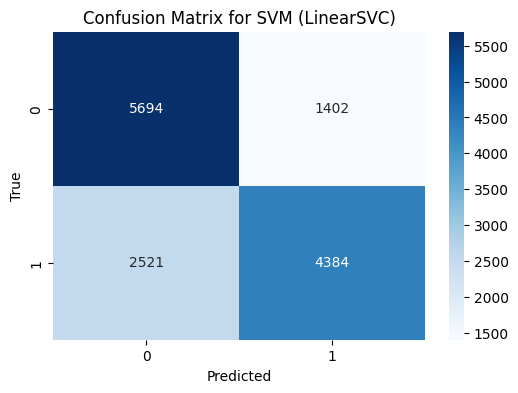

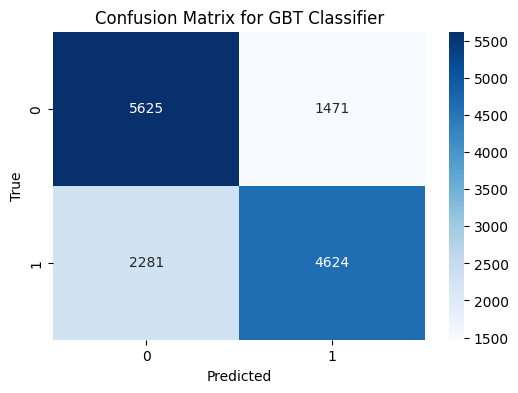

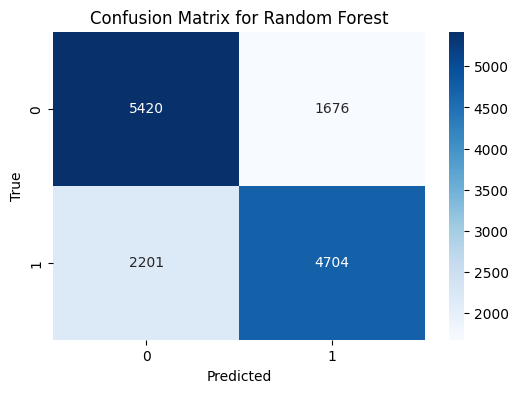

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(model_name, true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Define the true and predicted labels for all models
true_labels = {
    'Logistic Regression': lr_true_labels,
    'Multilayer Perceptron': mlp_true_labels,
    'Decision Tree': dt_true_labels,
    'SVM (LinearSVC)': svm_true_labels,
    'GBT Classifier': gbt_true_labels,
    'Random Forest': rf_true_labels
}

predicted_labels = {
    'Logistic Regression': lr_predicted_labels,
    'Multilayer Perceptron': mlp_predicted_labels,
    'Decision Tree': dt_predicted_labels,
    'SVM (LinearSVC)': svm_predicted_labels,
    'GBT Classifier': gbt_predicted_labels,
    'Random Forest': rf_predicted_labels
}

# Plot confusion matrices for all models
for model_name in true_labels:
    plot_confusion_matrix(model_name, true_labels[model_name], predicted_labels[model_name])


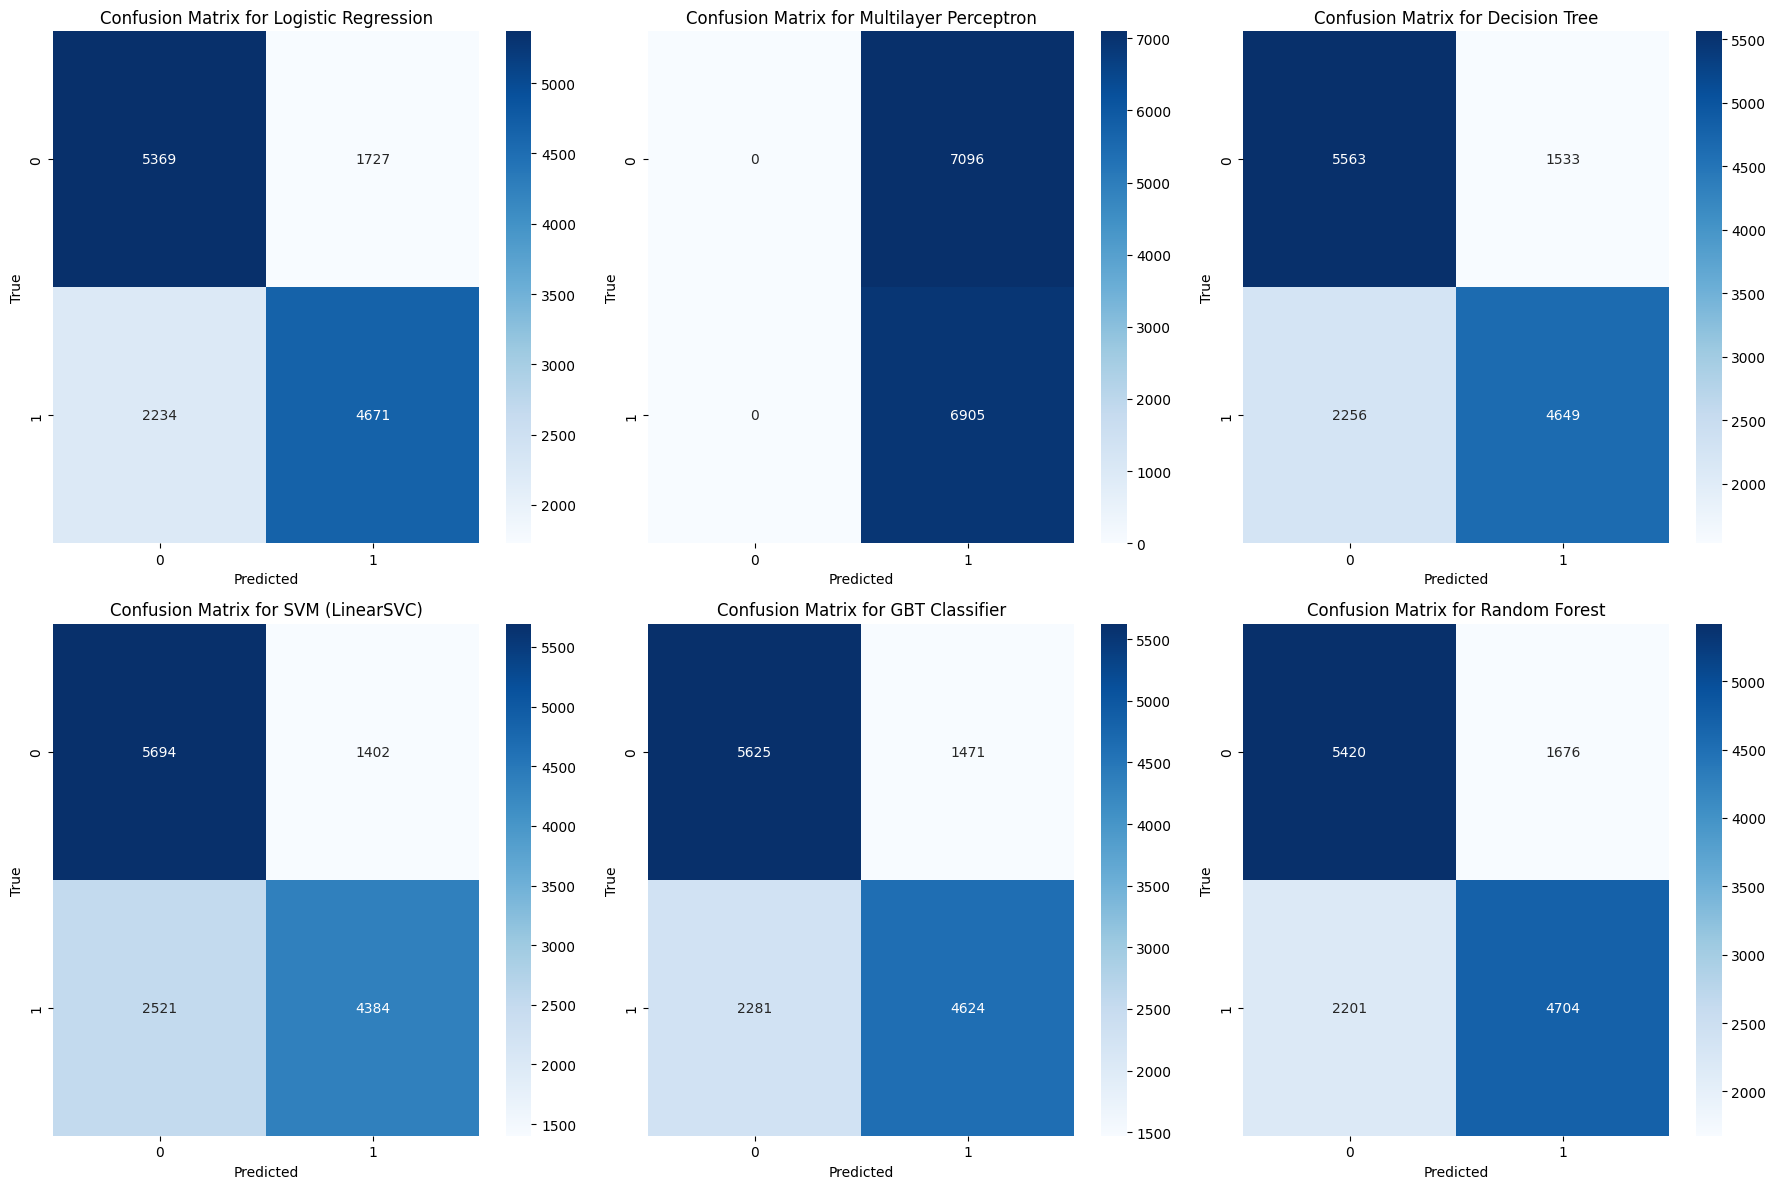

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model_name, true_labels, predicted_labels, position):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.subplot(position)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')

# Create a 2x3 grid for the confusion matrices
plt.figure(figsize=(18, 12))

# Plot the confusion matrices for each model
plot_confusion_matrix("Logistic Regression", lr_true_labels, lr_predicted_labels, 231)
plot_confusion_matrix("Multilayer Perceptron", mlp_true_labels, mlp_predicted_labels, 232)
plot_confusion_matrix("Decision Tree", dt_true_labels, dt_predicted_labels, 233)
plot_confusion_matrix("SVM (LinearSVC)", svm_true_labels, svm_predicted_labels, 234)
plot_confusion_matrix("GBT Classifier", gbt_true_labels, gbt_predicted_labels, 235)
plot_confusion_matrix("Random Forest", rf_true_labels, rf_predicted_labels, 236)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Initialize dictionaries to store metrics for each model
metrics = {}

# Calculate metrics for each model
for model_name in true_labels:
    cm = confusion_matrix(true_labels[model_name], predicted_labels[model_name])
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(true_labels[model_name], predicted_labels[model_name])
    precision = precision_score(true_labels[model_name], predicted_labels[model_name])
    recall = recall_score(true_labels[model_name], predicted_labels[model_name])
    f1 = f1_score(true_labels[model_name], predicted_labels[model_name])

    # Calculate Sensitivity (True Positive Rate)
    sensitivity = tp / (tp + fn) * 100

    # Calculate Specificity (True Negative Rate)
    specificity = tn / (tn + fp) * 100

    metrics[model_name] = {
        'TP': tp,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }

# Print the calculated metrics
for model_name, metric_values in metrics.items():
    print(f'Model: {model_name}')
    print(f'TP: {metric_values["TP"]}')
    print(f'TN: {metric_values["TN"]}')
    print(f'FP: {metric_values["FP"]}')
    print(f'FN: {metric_values["FN"]}')
    print(f'Accuracy: {metric_values["Accuracy"]}')
    print(f'Precision: {metric_values["Precision"]}')
    print(f'Recall: {metric_values["Recall"]}')
    print(f'F1 Score: {metric_values["F1 Score"]}')
    print(f'Sensitivity: {metric_values["Sensitivity"]:.2f}%')
    print(f'Specificity: {metric_values["Specificity"]:.2f}%')
    print('-' * 50)


Model: Logistic Regression
TP: 4671
TN: 5369
FP: 1727
FN: 2234
Accuracy: 0.717091636311692
Precision: 0.7300718974679588
Recall: 0.6764663287472846
F1 Score: 0.7022476133203038
Sensitivity: 67.65%
Specificity: 75.66%
--------------------------------------------------
Model: Multilayer Perceptron
TP: 6905
TN: 0
FP: 7096
FN: 0
Accuracy: 0.4931790586386687
Precision: 0.4931790586386687
Recall: 1.0
F1 Score: 0.6605759112216589
Sensitivity: 100.00%
Specificity: 0.00%
--------------------------------------------------
Model: Decision Tree
TP: 4649
TN: 5563
FP: 1533
FN: 2256
Accuracy: 0.7293764731090636
Precision: 0.7520219993529602
Recall: 0.6732802317161477
F1 Score: 0.7104760449300833
Sensitivity: 67.33%
Specificity: 78.40%
--------------------------------------------------
Model: SVM (LinearSVC)
TP: 4384
TN: 5694
FP: 1402
FN: 2521
Accuracy: 0.7198057281622742
Precision: 0.7576909782232976
Recall: 0.634902244750181
F1 Score: 0.6908833031282011
Sensitivity: 63.49%
Specificity: 80.24%
------

In [ ]:
# Initialize and train Multilayer Perceptron model
layers = [len(selected_features), 6, 6, 2]
mlp = MultilayerPerceptronClassifier(featuresCol="features", labelCol="cardio", layers=layers)
mlp_model = mlp.fit(train_data)
mlp_predictions = mlp_model.transform(test_data)

# Initialize and train Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="cardio")
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)

# Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="cardio")
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)

# Initialize and train SVM (LinearSVC) model
svm = LinearSVC(featuresCol="features", labelCol="cardio")
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)

# Calculate metrics for Logistic Regression model
lr_accuracy = evaluator.evaluate(lr_predictions)
lr_f1 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "f1"})
lr_precision = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedPrecision"})
lr_recall = evaluator.evaluate(lr_predictions, {evaluator.metricName: "weightedRecall"})

# Calculate metrics for Multilayer Perceptron model
mlp_accuracy = evaluator.evaluate(mlp_predictions)
mlp_f1 = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "f1"})
mlp_precision = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedPrecision"})
mlp_recall = evaluator.evaluate(mlp_predictions, {evaluator.metricName: "weightedRecall"})

# Calculate metrics for Decision Tree model
dt_accuracy = evaluator.evaluate(dt_predictions)
dt_f1 = evaluator.evaluate(dt_predictions, {evaluator.metricName: "f1"})
dt_precision = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedPrecision"})
dt_recall = evaluator.evaluate(dt_predictions, {evaluator.metricName: "weightedRecall"})

# Calculate metrics for SVM model
svm_accuracy = evaluator.evaluate(svm_predictions)
svm_f1 = evaluator.evaluate(svm_predictions, {evaluator.metricName: "f1"})
svm_precision = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedPrecision"})
svm_recall = evaluator.evaluate(svm_predictions, {evaluator.metricName: "weightedRecall"})


In [ ]:
# Print metrics for Logistic Regression model
print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")

# Print metrics for Multilayer Perceptron model
print("\nMultilayer Perceptron Metrics:")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"F1 Score: {mlp_f1:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")

# Print metrics for Decision Tree model
print("\nDecision Tree Metrics:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"F1 Score: {dt_f1:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")

# Print metrics for SVM model
print("\nSVM Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")


Logistic Regression Metrics:
Accuracy: 0.7171
F1 Score: 0.7166
Precision: 0.7180
Recall: 0.7171

Multilayer Perceptron Metrics:
Accuracy: 0.4932
F1 Score: 0.3258
Precision: 0.2432
Recall: 0.4932

Decision Tree Metrics:
Accuracy: 0.7294
F1 Score: 0.7285
Precision: 0.7315
Recall: 0.7294

SVM Metrics:
Accuracy: 0.7198
F1 Score: 0.7177
Precision: 0.7250
Recall: 0.7198


In [ ]:
# Example: Plot histograms for each feature
for feature in selected_features:
    df.groupBy("cardio").agg({feature: "mean"}).show()


+------+------------------+
|cardio|          avg(age)|
+------+------------------+
|     1| 20056.81303067555|
|     0|18881.623711487395|
+------+------------------+

+------+------------------+
|cardio|       avg(gender)|
+------+------------------+
|     1|1.3534406358100575|
|     0|1.3457068615973273|
+------+------------------+

+------+------------------+
|cardio|       avg(height)|
+------+------------------+
|     1| 164.2703336287487|
|     0|164.44801690414323|
+------+------------------+

+------+-----------------+
|cardio|      avg(weight)|
+------+-----------------+
|     1|76.82236770633808|
|     0|71.59215042403129|
+------+-----------------+

+------+------------------+
|cardio|        avg(ap_hi)|
+------+------------------+
|     1|137.21204151062065|
|     0|120.43259758430656|
+------+------------------+

+------+------------------+
|cardio|        avg(ap_lo)|
+------+------------------+
|     1|109.02392864290003|
|     0| 84.25176322777762|
+------+-------------

In [ ]:
# Example: Create a new feature 'bmi' (Body Mass Index)
bdf = df.withColumn("bmi", df["weight"] / ((df["height"] / 100) ** 2))


In [ ]:
bdf.show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+------------------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|               bmi|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+------------------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|  21.9671201814059|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|34.927679158448385|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|23.507805325987146|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1| 28.71047932495361|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|23.011176857330703|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|29.384676110696898|
|  9|22113|     1|   157|  93.0|  130|   80|  

In [ ]:

# Define all the feature columns, including "bmi"
bselected_features = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active", "bmi"]

# Feature vector assembly to include "bmi"
bassembler = VectorAssembler(inputCols=bselected_features, outputCol="features")
assembled_bdf = bassembler.transform(bdf)

# Select the relevant columns for your new DataFrame
new_df = assembled_bdf.select("features", "cardio")

# Show the first few rows of the new DataFrame
new_df.show()

+--------------------+------+
|            features|cardio|
+--------------------+------+
|[18393.0,2.0,168....|     0|
|[20228.0,1.0,156....|     1|
|[18857.0,1.0,165....|     1|
|[17623.0,2.0,169....|     1|
|[17474.0,1.0,156....|     0|
|[21914.0,1.0,151....|     0|
|[22113.0,1.0,157....|     0|
|[22584.0,2.0,178....|     1|
|[17668.0,1.0,158....|     0|
|[19834.0,1.0,164....|     0|
|[22530.0,1.0,169....|     0|
|[18815.0,2.0,173....|     0|
|[14791.0,2.0,165....|     0|
|[19809.0,1.0,158....|     0|
|[14532.0,2.0,181....|     0|
|[16782.0,2.0,172....|     1|
|[21296.0,1.0,170....|     0|
|[16747.0,1.0,158....|     0|
|[17482.0,1.0,154....|     0|
|[21755.0,2.0,162....|     0|
+--------------------+------+
only showing top 20 rows



In [ ]:
(train_data, test_data) = new_df.randomSplit([0.8, 0.2], seed=123)

# Show the number of rows in each set
print("Training Data Count:", train_data.count())
print("Testing Data Count:", test_data.count())

Training Data Count: 55999
Testing Data Count: 14001


In [ ]:
# Import the Random Forest model
from pyspark.ml.classification import RandomForestClassifier

# Initialize and train a Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="cardio")
rf_model = rf.fit(train_data)

# Get feature importance scores
feature_importance = rf_model.featureImportances

# Print feature importance scores
print("Feature Importance Scores:")
for feature, importance in zip(bselected_features, feature_importance):
    print(f"{feature}: {importance:.4f}")


Feature Importance Scores:
age: 0.1017
gender: 0.0005
height: 0.0005
weight: 0.0231
ap_hi: 0.4886
ap_lo: 0.2905
cholesterol: 0.0759
gluc: 0.0029
smoke: 0.0004
alco: 0.0003
active: 0.0009
bmi: 0.0148


In [ ]:
# Example: Use StandardScaler to scale numerical features
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(new_df)
new_df = scaler_model.transform(new_df)


In [ ]:
new_df.show()

+--------------------+------+--------------------+
|            features|cardio|     scaled_features|
+--------------------+------+--------------------+
|[18393.0,2.0,168....|     0|[7.45485361068373...|
|[20228.0,1.0,156....|     1|[8.19859614184258...|
|[18857.0,1.0,165....|     1|[7.64291711720019...|
|[17623.0,2.0,169....|     1|[7.14276546409392...|
|[17474.0,1.0,156....|     0|[7.08237438118238...|
|[21914.0,1.0,151....|     0|[8.88194759008989...|
|[22113.0,1.0,157....|     0|[8.96260413706570...|
|[22584.0,2.0,178....|     1|[9.15350480855116...|
|[17668.0,1.0,158....|     0|[7.16100438175176...|
|[19834.0,1.0,164....|     0|[8.03890428501610...|
|[22530.0,1.0,169....|     0|[9.13161810736174...|
|[18815.0,2.0,173....|     0|[7.62589412738620...|
|[14791.0,2.0,165....|     0|[5.99492957949345...|
|[19809.0,1.0,158....|     0|[8.02877155298396...|
|[14532.0,2.0,181....|     0|[5.88995447564051...|
|[16782.0,2.0,172....|     1|[6.80190035853283...|
|[21296.0,1.0,170....|     0|[8

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder
param_grid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()


In [ ]:
rf = RandomForestClassifier(featuresCol="features", labelCol="cardio")
rf_model = rf.fit(train_data)


In [ ]:

evaluator = MulticlassClassificationEvaluator(labelCol="cardio", predictionCol="prediction", metricName="accuracy")

In [ ]:
# Define the hyperparameter grid
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 30]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

# Cross-Validation
# Example: Use 5-fold cross-validation to estimate model performance
from pyspark.ml.tuning import CrossValidator
crossval = CrossValidator(estimator=rf, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

In [ ]:
# Perform cross-validation
cv_model = crossval.fit(train_data)

# Get the best model from cross-validation
best_rf_model = cv_model.bestModel

# Make predictions on the test data
predictions = best_rf_model.transform(test_data)

# Calculate metrics for the best model
accuracy = evaluator.evaluate(predictions)
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7311620598528676
F1 Score: 0.7304159745278727
Precision: 0.7333330097588056
Recall: 0.7311620598528676


In [ ]:
# Calculate true positives (TP), false negatives (FN)
tp = predictions[(predictions["cardio"] == 1) & (predictions["prediction"] == 1)].count()
fn = predictions[(predictions["cardio"] == 1) & (predictions["prediction"] == 0)].count()

# Calculate sensitivity (True Positive Rate)
sensitivity = tp / (tp + fn)
print("Sensitivity:", sensitivity)


Sensitivity: 0.6795000718287603
